In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tikzplotlib

# I import my package:

import averagedistorsion as ad

In [2]:
font = {'size': 14}
  
# using rc function
plt.rc('font', **font)

In [6]:
rules = ["harmonic",
         "borda",
         "oddBorda",
         #"plurality",
         "veto",
         "kApp"
         ]

n_candidates = 2
n_irrelevant_candidates = 13
n_tries = 10000

In [7]:
experiment = ad.ExperimentWorstCase(rules, 
                                    n_candidates=n_candidates,
                                    n_irrelevant_candidates=n_irrelevant_candidates,
                                    n_tries=n_tries)

100%|██████████| 5/5 [02:19<00:00, 27.94s/it]


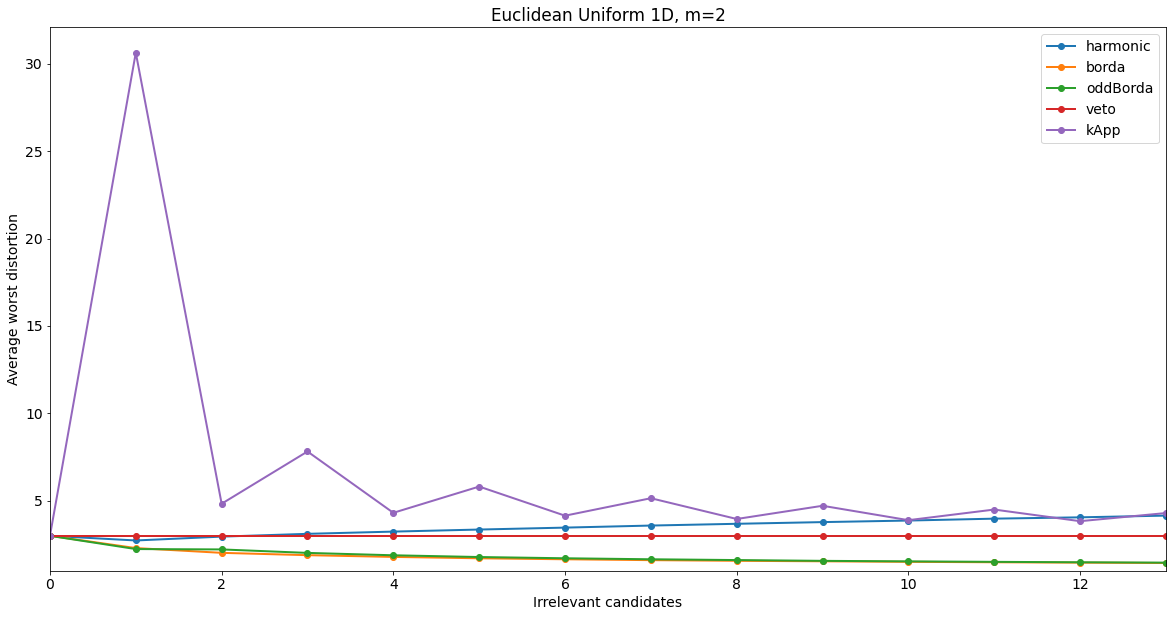

In [8]:
experiment(model=np.random.rand)
experiment.show_distortion("Euclidean Uniform 1D")
experiment.save_results("results/irrelevant_experiment_worst_case_1d.csv")

In [17]:
res = np.loadtxt("results/irrelevant_experiment_worst_case_1d.csv", delimiter=",", dtype=str)
rule_dict = {}
for row in res:
    rule = row[0]
    n_cand = int(row[2])
    dist = float(row[4])
    if rule not in rule_dict:
            rule_dict[rule] = []
    rule_dict[rule].append(dist)

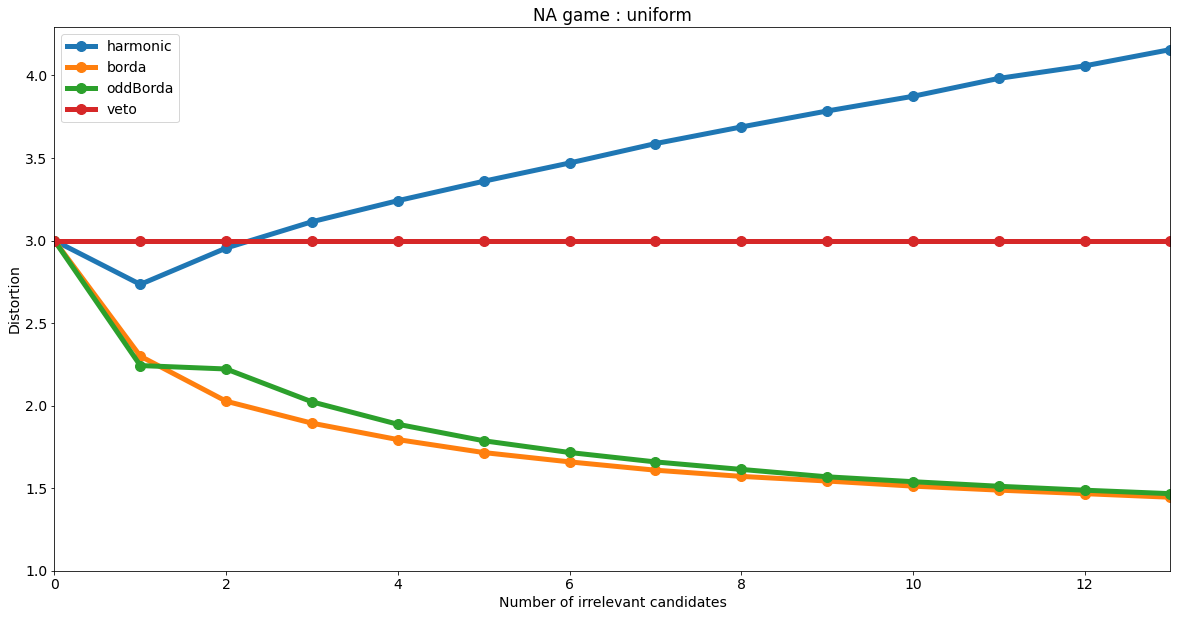

In [20]:
plt.figure(figsize=(20, 10))
for j,rule in enumerate(rule_dict):
    if rule not in ["harmonic", "borda", "oddBorda", "veto"]:
        continue
    line_format = "o-"
    if j >= 10:
        line_format = "o--"
    plt.plot(np.arange(0,14), rule_dict[rule], line_format, linewidth=5, markersize=10, label=rule)
plt.legend()
plt.xlim(0,13)
plt.ylim(1)
plt.title("NA game : uniform")
plt.xlabel("Number of irrelevant candidates")
plt.ylabel("Distortion")
tikzplotlib.save("Figures/NA_uniform_.tex")
plt.savefig("Figures/NA_uniform.png")
plt.show()